## N-ASSET EFFICIENT FRONTIER (Part III)

In [1]:
# used during development to releoad modules every time there is a change
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize
from risk_kit import Metrics, pre_processing_ind, plot_ef2
pd.options.display.float_format = '{:.6f}'.format

In [2]:
ind = pre_processing_ind()
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.005600,-0.051900,0.012900,0.029300,0.109700,-0.004800,0.080800,0.017700,0.081400,0.003900,...,0.008300,0.092200,0.020600,0.077000,0.019300,-0.237900,0.000700,0.018700,0.003700,0.052000
1926-08,0.025900,0.270300,0.065000,0.005500,0.100100,-0.035800,-0.025100,0.042500,0.055000,0.081400,...,0.021700,0.020200,0.043900,-0.023800,0.048800,0.053900,-0.007500,-0.001300,0.044600,0.067600
1926-09,0.011600,0.040200,0.012600,0.065800,-0.009900,0.007300,-0.005100,0.006900,0.053300,0.023100,...,0.024100,0.022500,0.001900,-0.055400,0.000500,-0.078700,0.002500,-0.005600,-0.012300,-0.038600
1926-10,-0.030600,-0.033100,0.010600,-0.047600,0.094700,-0.046800,0.001200,-0.005700,-0.047600,0.010000,...,-0.001100,-0.020000,-0.010900,-0.050800,-0.026400,-0.153800,-0.022000,-0.041100,-0.051600,-0.084900
1926-11,0.063500,0.072900,0.045500,0.016600,-0.058000,-0.005400,0.018700,0.054200,0.052000,0.031100,...,0.016300,0.037700,0.036400,0.038400,0.016000,0.046700,0.065200,0.043300,0.022400,0.040000


In [3]:
ass_to_invest = ["Smoke", "Fin", "Games", "Coal"]
metrics= Metrics()
ind2 = ind["1996":"2000"][ass_to_invest]
# Generate expected Return vector and Covariance matrix
rets = ind2.agg(metrics.annualized_rets)
cov = ind2.cov()

In [4]:
rets

Smoke   0.107830
Fin     0.223371
Games   0.068212
Coal    0.414689
dtype: float64

In [5]:
cov

,Smoke,Fin,Games,Coal
Smoke,0.008349,0.001312,0.000379,-0.000733
Fin,0.001312,0.003982,0.002416,0.002946
Games,0.000379,0.002416,0.003773,0.001888
Coal,-0.000733,0.002946,0.001888,0.018641


In [6]:
#w15= metrics.minimize_vol(target_return=0.15, rets=rets, cov=cov)
#vol15 = metrics.portfolio_vol(w15, cov)
#vol15

In [7]:
#w15

<Axes: xlabel='Vol'>

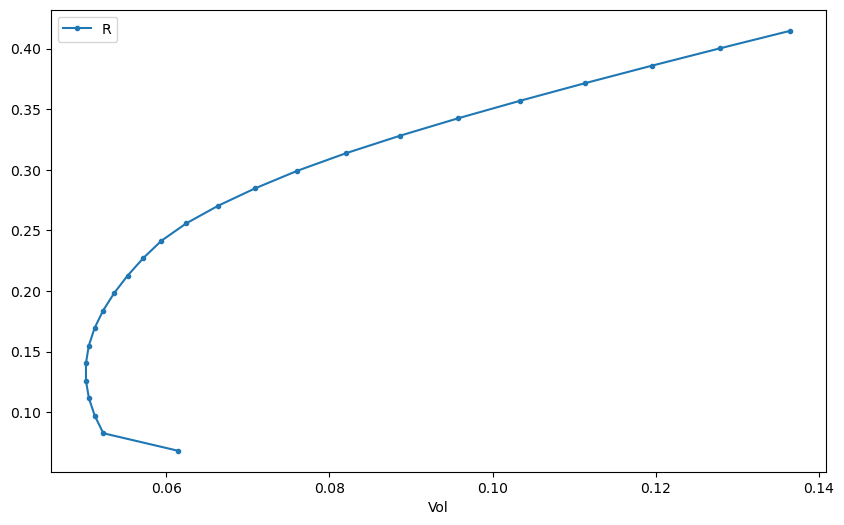

In [8]:
metrics.plot_ef(25, rets, cov)

## Finding the Maximum SR Portfolio

In [9]:
ind3 = ind["1996":"2000"]
ind3.head()
ind3.shape

(60, 30)

In [10]:
# Generate expected Return vector and Covariance matrix
rets3 = ind3.agg(metrics.annualized_rets)
cov3 = ind3.cov()

<Axes: xlabel='Vol'>

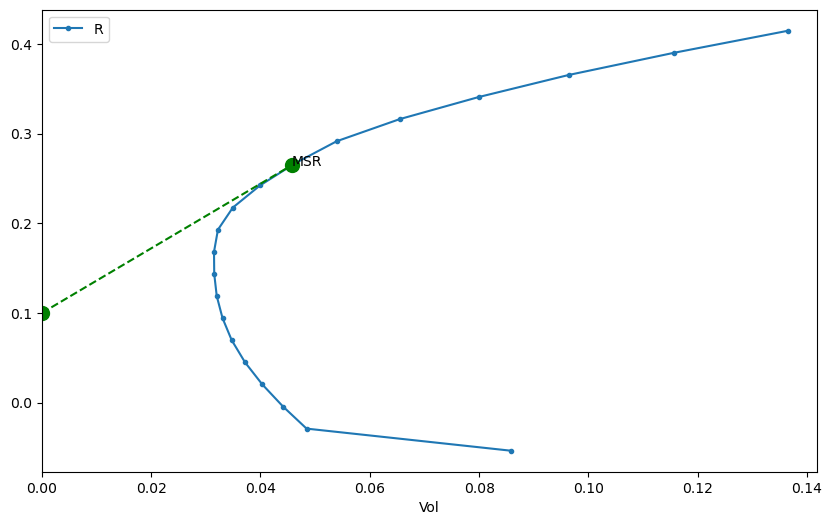

In [11]:
metrics.plot_ef(20, rets3, cov3, show_cml=True, riskfree_rate=0.1, show_ew=False)

### Lack of Robustness of the Markowitz Procedure, and the GMV

In [12]:
ass_to_invest = ["Food", "Steel"]
ind4 = ind["1996":"2000"][ass_to_invest]
ind4.head()
ind4.shape

(60, 2)

In [13]:
# Generate expected Return vector and Covariance matrix
rets = ind4.agg(metrics.annualized_rets)
cov = ind4.cov()

In [14]:
metrics.maximum_sharpe_ratio(0.1, rets, cov)

array([0.75040362, 0.24959638])

In [15]:
rets

Food    0.116799
Steel   0.115809
dtype: float64

The above are the actual return calculated ex-post. Actually, we are going to estimate the expected returns and feed the model with our estimation.
Let's suppose we are a the start of 1996 and that our estimation is pretty close to the real values.


In [16]:
# a small changes in the estimation of the expected returns (like in this case)
# produce a very different portfolio. As you can see here:
rets = np.array([0.11, 0.12])
metrics.maximum_sharpe_ratio(0.1, rets, cov)

array([0.57930354, 0.42069646])

In [17]:
# another case of pretty good estimation
rets = np.array([0.10, 0.13])
metrics.maximum_sharpe_ratio(0.1, rets, cov)

array([0., 1.])

In [18]:
# another case of pretty good estimation
rets = np.array([0.13, 0.10])
metrics.maximum_sharpe_ratio(0.1, rets, cov)

array([1., 0.])

In [19]:
# Error maximization estimation of the Markowitz procedure
# To avoid the use of expected return we can use it in two ways:
# 1) Equal Weight (EW or Naive) Portfolio
# 2) Computes the Global Minimum Variance Portfolio
#    which doesn't require the expected returns
# 

<Axes: xlabel='Vol'>

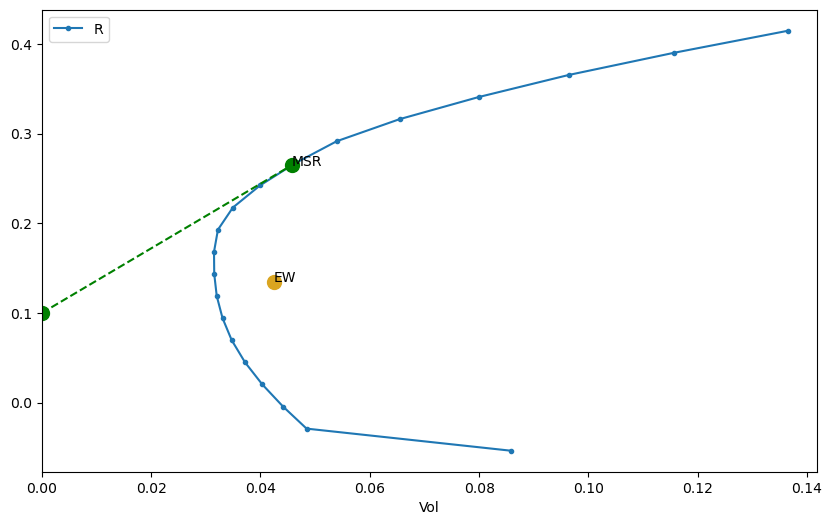

In [20]:
# the EW Portoflio is within the EF. However, it is still a good portfolio
# considering the fact that we don't need Returns estimation
# portfolio for the overall assets in the dataframe
metrics.plot_ef(20, rets3, cov3, show_cml=True, riskfree_rate=0.1, show_ew=True)

In [21]:
# we can do better with the GMV Portfolio. It does not depend on the expected returns

<Axes: xlabel='Vol'>

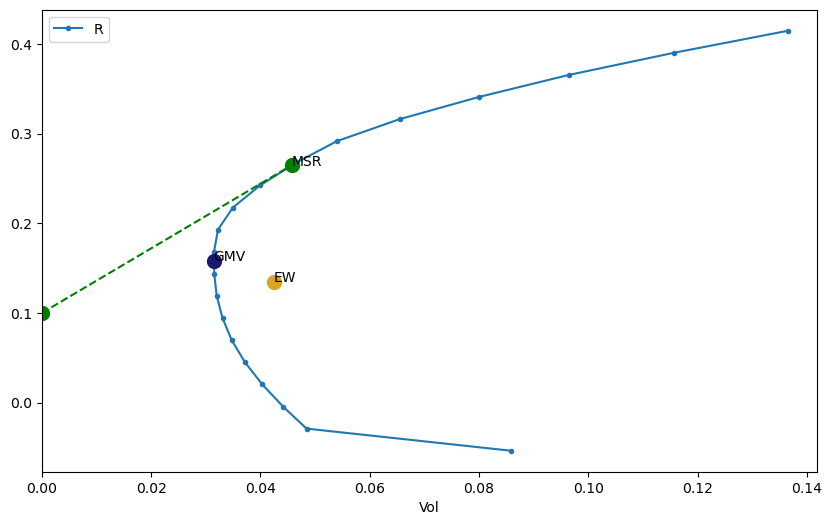

In [22]:
metrics.plot_ef(20, rets3, cov3, show_cml=True, \
                riskfree_rate=0.1, show_ew=True, show_gmv=True)

### FINAL COMMENTS:

The green point is the one we would like to be (Maximum Sharpe Ratio Portfolio.
However, an even very small error in the return estimation gives very wrong results.
Therefore the only available choices that don't depend on the expected returns are the EW (Naive) Portfolio (golden point) and the GMV (Global Minimum Variance) one. For the GMV, estimating the covariance matrix is a lot easier than estimating the expected return vector.